In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'C:\\Users\\Zhire\\OneDrive\\Рабочий стол\\jupyter\\ex4'

In [3]:
path = 'D:\\data\\'

In [4]:
df = pd.DataFrame()

for current_path, names, file  in os.walk(path):
    for f in file:
        p = current_path.split('\\')
        temp_df = pd.read_csv(current_path+"\\"+f)#os.path.join()
        temp_df['name'] = p[-1]
        temp_df['date'] = p[-2]
        df = pd.concat((df,temp_df))

In [5]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [6]:
df.reset_index(drop=True,inplace=True)

In [7]:
df

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


In [8]:
from pathlib import Path

In [20]:
path = 'D:\\data\\'

In [23]:
path = Path(path)

In [24]:
path

WindowsPath('D:/data')

In [36]:
df = pd.DataFrame()

for current_path, names, file  in os.walk(path):
    for f in file:
        part_path = Path(current_path)
        data_path = part_path / file

        temp_df = pd.read_csv(data_path)
        p = data_path.split('\\')
        temp_df['name'] = p[-1]
        temp_df['date'] = p[-2]
        df = pd.concat((df,temp_df))

TypeError: unsupported operand type(s) for /: 'WindowsPath' and 'list'

In [9]:
df.name.value_counts()

Alexey_Smirnov       18
Petr_Smirnov         14
Anton_Smirnov        14
Petr_Fedorov         12
Alexey_Fedorov       11
Vasiliy_Ivanov       10
Rostislav_Petrov      9
Petr_Ivanov           8
Kirill_Fedorov        8
Kirill_Smirnov        7
Anton_Ivanov          7
Anton_Petrov          6
Alexey_Ivanov         6
Rostislav_Fedorov     5
Rostislav_Smirnov     5
Petr_Petrov           5
Vasiliy_Fedorov       4
Kirill_Petrov         4
Alexey_Petrov         3
Rostislav_Ivanov      3
Vasiliy_Petrov        2
Name: name, dtype: int64

In [10]:
max_products_number = df.groupby('name').agg({'quantity':'sum'}).sort_values('quantity',ascending = False).quantity.max()

In [11]:
df.groupby('name',as_index=False).agg({'quantity':'sum'}).query('quantity == @max_products_number').name.tolist()

['Alexey_Smirnov', 'Petr_Smirnov']

In [12]:
top_ten = df.groupby('product_id',as_index=False).agg({'quantity':'sum'}).sort_values('quantity',ascending = False).head(10)

In [13]:
top_ten

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


<Axes: xlabel='product_id', ylabel='quantity'>

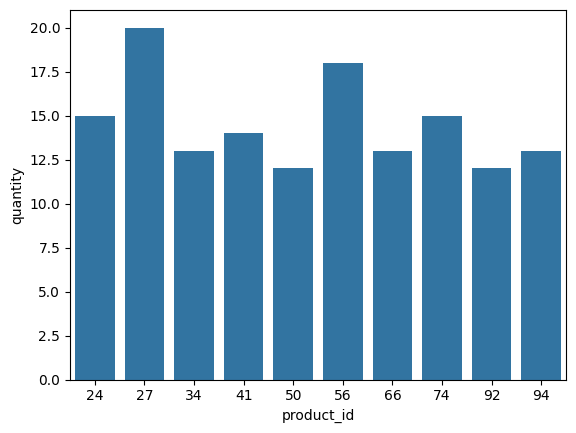

In [14]:
sns.barplot(data=top_ten,y='quantity',x='product_id')

In [15]:
df.query('product_id==56').groupby('product_id').agg({'quantity':'sum'})

,quantity
product_id,
56,18


In [16]:
group_date = df.groupby('date').agg({'quantity':'sum'})

In [17]:
group_date

,quantity
date,
2020-12-03,60
2020-12-04,113
2020-12-05,61
2020-12-06,15
2020-12-07,94
2020-12-08,68
2020-12-09,69


<Axes: xlabel='date', ylabel='quantity'>

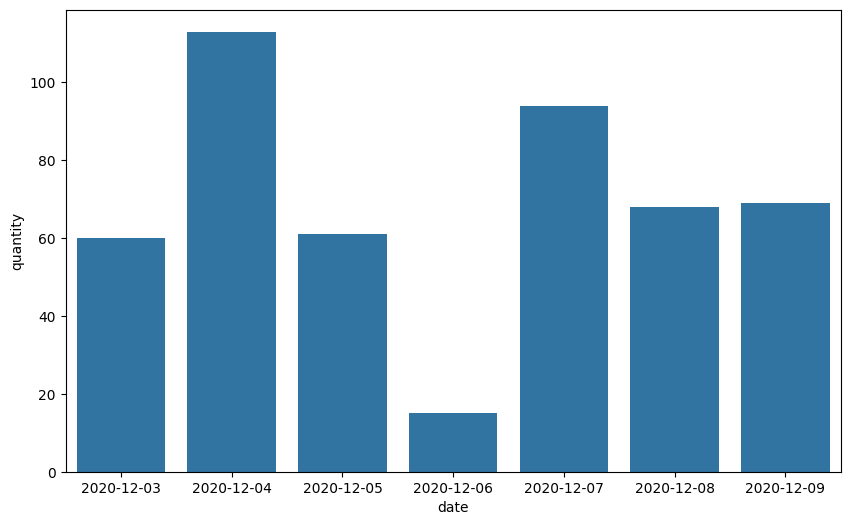

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data = group_date, y='quantity',x='date')

In [19]:
df.groupby(['name','product_id']).agg({'date': pd.Series.nunique}).query('date>1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
